In [14]:
#PREPROCESS STEP


import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# DATASET
data = pd.read_csv(r'C:\Users\nh013\Desktop\inflation data set\ADO April 2023 - Inflation.csv', encoding='latin1')

# REMOVE LEADING AND TRAILING SPACE FROM COLUMN
data.columns = data.columns.str.strip()

# DROP UNEED COULMN
columns_to_drop = ['Subregion']
data = data.drop(columns=columns_to_drop)

# MANAGE MISSING VALUE
data['Country Code'] = data['Country Code'].fillna('Unknown')

# CONVERT YEAR COLUMN TO NUMERIC FORMAT
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]

# CONVERT DATA TYPE
data['Year'] = pd.to_numeric(data['Year'])
data['Inflation'] = pd.to_numeric(data['Inflation'])

# CHECK UNIT OF MEASUREMENT IS % AVAILABLE OR NOT
if data['Unit of Measurement'].unique() != ['%']:
    print("Data consistency check failed. Unit of Measurement is not '%'.")
    
# NORMALIZE AND SCALE ALL NUMERICAL COLUMNS
scaler = MinMaxScaler()
num_cols = data.select_dtypes(include='number').columns
data[num_cols] = scaler.fit_transform(data[num_cols])

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print(data.head(10))


                       RegionalMember      Year  Inflation  \
0                     Developing Asia -1.414214  -0.362047   
1                     Developing Asia -0.707107  -0.254212   
2                     Developing Asia  0.000000  -0.232645   
3                     Developing Asia  0.707107  -0.383614   
4                     Developing Asia  1.414214   0.004592   
7   Developing Asia excluding the PRC -1.414214  -0.232645   
8   Developing Asia excluding the PRC -0.707107  -0.189511   
9   Developing Asia excluding the PRC  0.000000  -0.060109   
10  Developing Asia excluding the PRC  0.707107  -0.038542   
11  Developing Asia excluding the PRC  1.414214   0.500633   

   Unit of Measurement Country Code  
0                    %      Unknown  
1                    %      Unknown  
2                    %      Unknown  
3                    %      Unknown  
4                    %      Unknown  
7                    %      Unknown  
8                    %      Unknown  
9            

In [2]:
import pandas as pd
from scipy.stats import ttest_ind

# DATASET
data = pd.read_csv(r'C:\Users\nh013\Desktop\inflation data set\ADO April 2023 - Inflation.csv', encoding='latin1')

# REMOVE LEADING AND TRAILING SPACE FROM COLUMN
data.columns = data.columns.str.strip()

# DROP UNEED COULMN
columns_to_drop = ['Subregion']
data = data.drop(columns=columns_to_drop)

# MANAGE MISSING VALUE
data['Country Code'] = data['Country Code'].fillna('Unknown')

# CONVERT YEAR COLUMN TO NUMERIC FORMAT
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]

# CONVERT DATA TYPE
data['Year'] = pd.to_numeric(data['Year'])
data['Inflation'] = pd.to_numeric(data['Inflation'])


# CHECK UNIT OF MEASUREMENT IS % AVAILABLE OR NOT
if data['Unit of Measurement'].unique() != ['%']:
    print("Data consistency check failed. Unit of Measurement is not '%'.")
          


# PERFORM GROUPBY METHOD
grouped_data = data.groupby('RegionalMember')['Inflation'].mean()
print(grouped_data)




summary_stats = data['Inflation'].describe()
print(summary_stats)



RegionalMember
Afghanistan                           5.500000
Armenia                               4.180000
Azerbaijan                            5.700000
Bangladesh                            5.760000
Bhutan                                4.780000
Brunei Darussalam                     1.580000
Cambodia                              3.100000
Caucasus and Central Asia             9.040000
Cook Islands                          1.360000
Developing Asia                       3.240000
Developing Asia excluding the PRC     4.360000
East Asia                             2.040000
Federated States of Micronesia        2.220000
Fiji                                  1.560000
Georgia                               6.840000
Hong Kong, China                      1.820000
India                                 5.320000
Indonesia                             3.140000
Kazakhstan                            8.220000
Kiribati                              1.420000
Kyrgyz Republic                       6.94000

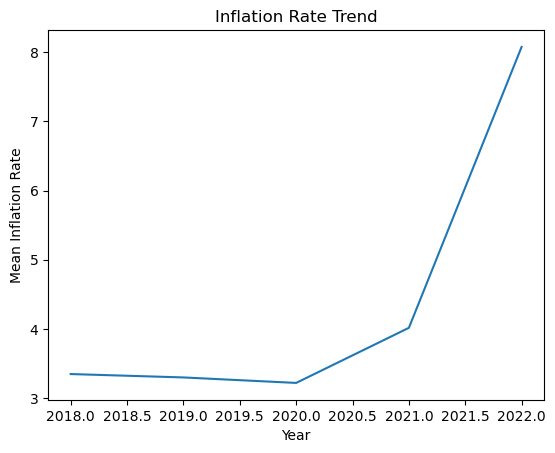

In [3]:
#CALCULATE AND VISUALIZE THE TREND OF INFLATION RATE OVER TIME
# TIME SERIES ANALYSIS: (TREND ANALYSIS)



import pandas as pd
import matplotlib.pyplot as plt

# DATA 
data = pd.read_csv(r'C:\Users\nh013\Desktop\inflation data set\ADO April 2023 - Inflation.csv', encoding='latin1')

# REMOVE LEADING AND TRAILING SPACE FROM COLUMN
data.columns = data.columns.str.strip()

# DROP UNNECESSARY COLUMN
columns_to_drop = ['Subregion']
data = data.drop(columns=columns_to_drop)

# MANAGE MISSING VALUES
data['Country Code'] = data['Country Code'].fillna('Unknown')

# CONVERT YEAR COLUMN TO NUMERIC FORMAT
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]

# CONVERT DATA TYPE
data['Year'] = pd.to_numeric(data['Year'])
data['Inflation'] = pd.to_numeric(data['Inflation'])


# CHECK UNIT OF MEASUREMENT IS % AVAILABLE OR NOT
if data['Unit of Measurement'].unique() != ['%']:
    print("Data consistency check failed. Unit of Measurement is not '%'.")
    
# PERFORM GROUPBY METHOD
grouped_data = data.groupby('Year')['Inflation'].mean()

# VISUALIZE THE TRND LINE
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Year')
plt.ylabel('Mean Inflation Rate')
plt.title('Inflation Rate Trend')
plt.show()


In [11]:
# USING TIME SERIES MODEL:ARIMA MODEL

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# DATASET
data = pd.read_csv(r'C:\Users\nh013\Desktop\inflation data set\ADO April 2023 - Inflation.csv', encoding='latin1')

# REMOVE LEADING AND TRAILING SPACE FROM COLUMN
data.columns = data.columns.str.strip()

# DROP UNEED COLUMN
columns_to_drop = ['Subregion']
data = data.drop(columns=columns_to_drop)

# MANAGE MISSING VALUE
data['Country Code'] = data['Country Code'].fillna('Unknown')

# CONVERT YEAR COLUMN TO NUMERIC FORMAT
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data[data['Year'].notnull()]

# CONVERT DATA TYPE
data['Inflation'] = pd.to_numeric(data['Inflation'], errors='coerce')

# CHECK UNIT OF MEASUREMENT IS % AVAILABLE OR NOT
if data['Unit of Measurement'].unique() != ['%']:
    print("Data consistency check failed. Unit of Measurement is not '%'.")
else:
    
    
    # INFLATION COLUMN FOR TIME SERIES
    time_series = data['Inflation']

    # SPLIT DATA INTO TRAINING AND TESTING SET
    train_data = time_series.loc[time_series.index <= 2022]  
    test_data = time_series.loc[time_series.index == 2023]   

    # FIT THE MODEL FOR TRAINING
    model = ARIMA(train_data, order=(1, 1, 1)) # p,d,q values are 1 1 1 
    model_fit = model.fit()

    # FORECAST FUTURE VALUES USE BY FIT MODEL
    forecast = model_fit.get_forecast(steps=1)  #

   \
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

print("Forecasted values:")
print(forecast_values)
print("\nConfidence intervals:")
print(forecast_conf_int)


Forecasted values:
265    3.546219
dtype: float64

Confidence intervals:
     lower Inflation  upper Inflation
265        -5.060245        12.152683


C:\Users\nh013\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nh013\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nh013\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nh013\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
